# Convolutional Neural Networks
by Joelle Bailey for ECGR 4105 800984146

In [1]:
import torch
import torch.nn as nn

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets
from torchvision import transforms
data_path = '/data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified
Files already downloaded and verified


In [3]:
type(cifar10)

torchvision.datasets.cifar.CIFAR10

In [4]:
img_t, _ = cifar10[99]
type(img_t)

torch.Tensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


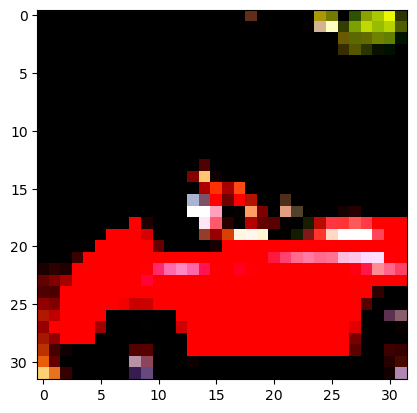

In [5]:
img_t, _ = cifar10[99]

plt.imshow(img_t.permute(1, 2, 0)) # Need to rearrage for printing
plt.show()

In [9]:
n_out = 10

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.LogSoftmax(dim =1)
)

loss_fn = nn.NLLLoss()

In [10]:
learning_rate = 1e-2

import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [11]:
n_epochs = 300

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

import time
training_1hidden_start_time = time.time()

for epoch in range(n_epochs):
    for img, label in train_loader:
        batch_size = img.shape[0]
        out = model(img.view(batch_size,-1))
        loss = loss_fn(out, label)
        
        optimizer.zero_grad()
        loss.backward()  #back propagation
        optimizer.step()
        
    if epoch % 2 == 0:
            print('Epoch %d, Training Loss %f' % (epoch, float(loss)))
            
print('Training finished, took {:.2f}s'.format(time.time() - training_1hidden_start_time))

Epoch 0, Training Loss 1.752804
Epoch 2, Training Loss 1.575360
Epoch 4, Training Loss 1.099887
Epoch 6, Training Loss 1.138529
Epoch 8, Training Loss 1.315857
Epoch 10, Training Loss 1.891225
Epoch 12, Training Loss 1.490237
Epoch 14, Training Loss 0.412081
Epoch 16, Training Loss 1.098441
Epoch 18, Training Loss 1.057772
Epoch 20, Training Loss 1.487097
Epoch 22, Training Loss 0.955058
Epoch 24, Training Loss 0.834943
Epoch 26, Training Loss 0.408199
Epoch 28, Training Loss 0.459710
Epoch 30, Training Loss 0.396547
Epoch 32, Training Loss 0.425056
Epoch 34, Training Loss 0.923534
Epoch 36, Training Loss 0.471935
Epoch 38, Training Loss 0.417362
Epoch 40, Training Loss 0.341376
Epoch 42, Training Loss 0.345548
Epoch 44, Training Loss 0.581854
Epoch 46, Training Loss 0.403462
Epoch 48, Training Loss 0.332754
Epoch 50, Training Loss 0.188427
Epoch 52, Training Loss 0.195487
Epoch 54, Training Loss 0.081002
Epoch 56, Training Loss 0.216723
Epoch 58, Training Loss 0.223697
Epoch 60, Train

In [12]:
torch.save(model.state_dict(), data_path + '1a.pt')

In [13]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f", correct / total)

Accuracy: %f 0.529


In [7]:
n_out = 10

model2 = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
            nn.LogSoftmax(dim =1)
)

loss_fn = nn.NLLLoss()

In [8]:
learning_rate = 1e-2

import torch.optim as optim
optimizer = optim.SGD(model2.parameters(), lr = learning_rate)

In [9]:
n_epochs = 300

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

import time
training_1hidden_start_time = time.time()

for epoch in range(n_epochs):
    for img, label in train_loader:
        batch_size = img.shape[0]
        out = model2(img.view(batch_size,-1))
        loss = loss_fn(out, label)
        
        optimizer.zero_grad()
        loss.backward()  #back propagation
        optimizer.step()
        
    if epoch % 2 == 0:
            print('Epoch %d, Training Loss %f' % (epoch, float(loss)))
            
print('Training finished, took {:.2f}s'.format(time.time() - training_1hidden_start_time))

Epoch 0, Training Loss 1.739498
Epoch 2, Training Loss 1.302628
Epoch 4, Training Loss 1.139454
Epoch 6, Training Loss 0.694356
Epoch 8, Training Loss 1.064420
Epoch 10, Training Loss 0.783168
Epoch 12, Training Loss 0.979610
Epoch 14, Training Loss 0.605398
Epoch 16, Training Loss 0.882681
Epoch 18, Training Loss 0.748953
Epoch 20, Training Loss 0.825911
Epoch 22, Training Loss 0.324946
Epoch 24, Training Loss 0.785077
Epoch 26, Training Loss 0.382771
Epoch 28, Training Loss 0.276592
Epoch 30, Training Loss 0.409464
Epoch 32, Training Loss 0.242729
Epoch 34, Training Loss 0.186554
Epoch 36, Training Loss 0.075788
Epoch 38, Training Loss 0.144197
Epoch 40, Training Loss 0.034487
Epoch 42, Training Loss 0.080850
Epoch 44, Training Loss 0.090589
Epoch 46, Training Loss 0.039799
Epoch 48, Training Loss 0.006188
Epoch 50, Training Loss 0.075421
Epoch 52, Training Loss 0.004394
Epoch 54, Training Loss 0.046092
Epoch 56, Training Loss 0.003596
Epoch 58, Training Loss 0.014953
Epoch 60, Train

In [10]:
torch.save(model2.state_dict(), data_path + '1b.pt')

In [13]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f", correct / total)

Accuracy: %f 0.5633


In [23]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8) # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [24]:
model3 = Net()

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

optimizer = optim.SGD(model3.parameters(), lr=1e-2)

loss_fn = nn.CrossEntropyLoss()

In [26]:
n_epochs = 300

training_1hidden_start_time = time.time()

for epoch in range(n_epochs):
    loss_train = 0.0
    for imgs, labels in train_loader:
        outputs = model3(imgs)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_train += loss.item()
        
    if epoch % 2 == 0:
        print('Epoch %d, Training Loss %f' % (epoch, loss_train/len(train_loader)))
        
print('Training finished, took {:.2f}s'.format(time.time() - training_1hidden_start_time))

KeyboardInterrupt: 

In [28]:
# Model trained on Google Colab
model3 = Net()
model3.load_state_dict(torch.load('2a.pt'))

<All keys matched successfully>

In [30]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                         shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model3, train_loader, val_loader)

Accuracy train: 0.80
Accuracy val: 0.61


In [31]:
import torch.nn.functional as F
class Net2(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [32]:
model4 = Net2()

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

optimizer = optim.SGD(model4.parameters(), lr=1e-2)

loss_fn = nn.CrossEntropyLoss()

In [ ]:
n_epochs = 300

import time
training_1hidden_start_time = time.time()

for epoch in range(n_epochs):
    loss_train = 0.0
    for imgs, labels in train_loader:
        outputs = model4(imgs)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_train += loss.item()
        
    if epoch % 2 == 0:
        print('Epoch %d, Training Loss %f' % (epoch, loss_train/len(train_loader)))
        
print('Training finished, took {:.2f}s'.format(time.time() - training_1hidden_start_time))

In [33]:
# Model trained on Google Colab
model4 = Net2()
model4.load_state_dict(torch.load('2b.pt'))

<All keys matched successfully>

In [35]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model4, train_loader, val_loader)

Accuracy train: 0.83
Accuracy val: 0.68
